<a href="https://colab.research.google.com/github/Jia-prog28/scholorship-project/blob/main/Scholorship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('/content/placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
# Define scholarship criteria (e.g., CGPA >= 7.0)
df['scholarship'] = df['cgpa'].apply(lambda x: 1 if x >= 7.0 else 0)
df.head()

,Unnamed: 0,cgpa,iq,placement,scholarship
0,0,6.8,123.0,1,0
1,1,5.9,106.0,0,0
2,2,5.3,121.0,0,0
3,3,7.4,132.0,1,1
4,4,5.8,142.0,0,0


In [11]:
df.shape

(100, 5)

In [12]:
df = df.iloc[:,1:]

In [13]:
df.head()

,cgpa,iq,placement,scholarship
0,6.8,123.0,1,0
1,5.9,106.0,0,0
2,5.3,121.0,0,0
3,7.4,132.0,1,1
4,5.8,142.0,0,0


In [14]:
df.shape

(100, 4)

In [15]:
import matplotlib.pyplot as plt

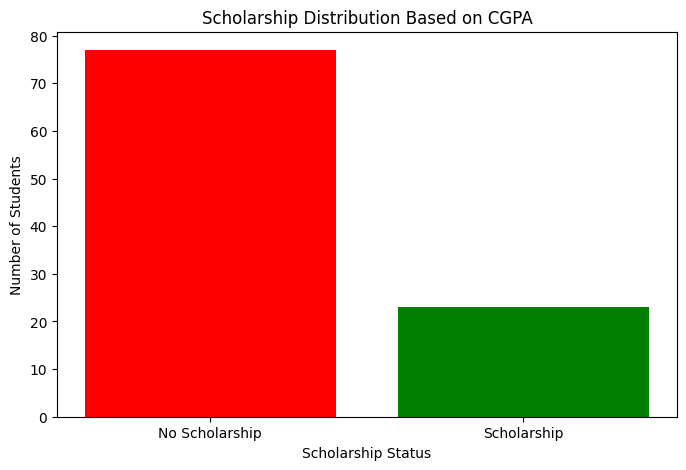

In [16]:
# Plot the graph
plt.figure(figsize=(8,5))
plt.bar(['No Scholarship', 'Scholarship'], df['scholarship'].value_counts(), color=['red', 'green'])
plt.xlabel("Scholarship Status")
plt.ylabel("Number of Students")
plt.title("Scholarship Distribution Based on CGPA")
plt.show()


In [17]:
# Selecting features (X) and target variable (y)
X = df.iloc[:,1:5]
y = df.iloc[:,-1]

In [18]:
X

,iq,placement,scholarship
0,123.0,1,0
1,106.0,0,0
2,121.0,0,0
3,132.0,1,1
4,142.0,0,0
...,...,...,...
95,200.0,0,0
96,42.0,0,0
97,182.0,1,0
98,103.0,1,0


In [19]:
y

,scholarship
0,0
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,0
98,0


In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
X_train

,iq,placement,scholarship
18,100.0,0,0
30,128.0,1,1
73,61.0,0,0
33,149.0,0,0
90,86.0,1,1
...,...,...,...
60,139.0,1,0
71,132.0,1,0
14,103.0,0,0
92,110.0,0,0


In [22]:
y_train

,scholarship
18,0
30,1
73,0
33,0
90,1
...,...
60,0
71,0
14,0
92,0


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[-0.62029848, -0.95650071, -0.53452248],
       [ 0.09806189,  1.04547753,  1.87082869],
       [-1.62087186, -0.95650071, -0.53452248],
       [ 0.63683217, -0.95650071, -0.53452248],
       [-0.97947867,  1.04547753,  1.87082869],
       [ 0.45724208, -0.95650071, -0.53452248],
       [ 0.79076654, -0.95650071, -0.53452248],
       [-1.90308486,  1.04547753,  1.87082869],
       [ 0.3802749 , -0.95650071, -0.53452248],
       [-0.38939693, -0.95650071, -0.53452248],
       [-0.26111829,  1.04547753,  1.87082869],
       [ 0.63683217, -0.95650071, -0.53452248],
       [ 1.91961855,  1.04547753,  1.87082869],
       [-0.90251149,  1.04547753,  1.87082869],
       [-0.10718393,  1.04547753,  1.87082869],
       [ 1.32953682, -0.95650071, -0.53452248],
       [ 0.25199626, -0.95650071, -0.53452248],
       [-2.10833068, -0.95650071, -0.53452248],
       [-1.49259322, -0.95650071, -0.53452248],
       [-0.20980684,  1.04547753,  1.87082869],
       [ 0.35461917,  1.04547753, -0.534

In [25]:
X_test

array([[ 0.14937335,  1.04547753,  1.87082869],
       [ 1.124291  ,  1.04547753,  1.87082869],
       [ 0.07240616,  1.04547753, -0.53452248],
       [-1.49259322,  1.04547753, -0.53452248],
       [-1.62087186,  1.04547753,  1.87082869],
       [ 0.55986499, -0.95650071, -0.53452248],
       [-0.10718393, -0.95650071, -0.53452248],
       [ 1.84265137, -0.95650071, -0.53452248],
       [-2.0313635 ,  1.04547753, -0.53452248],
       [-0.03021675,  1.04547753, -0.53452248]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions (e.g., to 2)
pca = PCA(n_components=2)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier on PCA-transformed data
clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

LogisticRegression()

In [39]:
y_pred = clf.predict(X_test_pca)


In [40]:
y_test

,scholarship
83,1
53,1
70,0
45,0
44,1
39,0
22,0
80,0
10,0
0,0


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [43]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [44]:
from mlxtend.plotting import plot_decision_regions

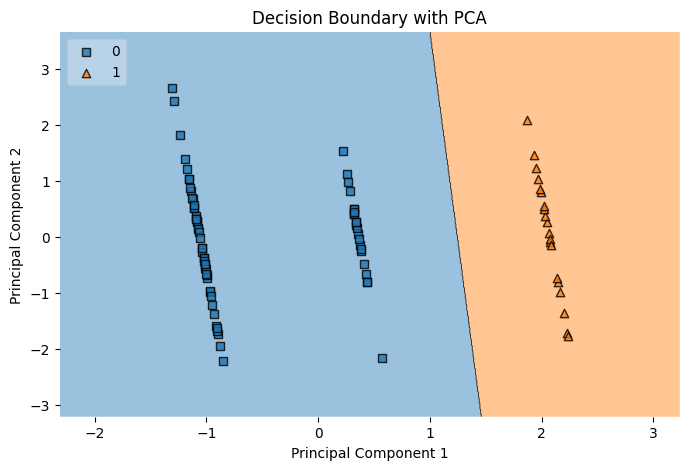

In [45]:

plt.figure(figsize=(8,5))
plot_decision_regions(X_train_pca, y_train.values, clf=clf, legend=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary with PCA")
plt.show()

In [46]:
import pickle

In [47]:
pickle.dump(clf,open('model.pkl','wb'))